In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import hvplot.pandas
from scipy.stats import linregress
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

ca_housing_path = "Resources/CA_Housing_Data.csv"

ca_housing_data = pd.read_csv(ca_housing_path)

ca_housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


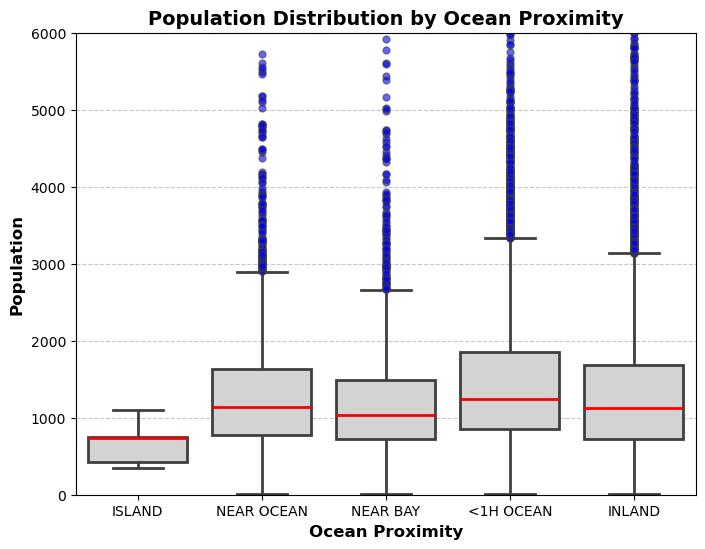

In [2]:
# Define the custom order for ocean proximity categories
custom_order = ["ISLAND", "NEAR OCEAN", "NEAR BAY", "<1H OCEAN", "INLAND"]

# Set figure size
plt.figure(figsize=(8, 6))

# Create a customized boxplot with the defined x-axis order
sns.boxplot(
    x=ca_housing_data["ocean_proximity"], 
    y=ca_housing_data["population"], 
    order=custom_order,  # Apply custom order
    boxprops={'linewidth': 2, 'facecolor': 'lightgray'},  
    medianprops={'color': 'red', 'linewidth': 2},  
    whiskerprops={'linewidth': 2},  
    capprops={'linewidth': 2},  
    flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'blue', 'alpha': 0.6}  
)

# Labels and title
plt.xlabel("Ocean Proximity", fontsize=12, fontweight='bold')
plt.ylabel("Population", fontsize=12, fontweight='bold')
plt.title("Population Distribution by Ocean Proximity", fontsize=14, fontweight='bold')
plt.ylim(0, 6000)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

This boxplot shows the distribution for the populations for the areas grouped by their proximity to the ocean. We can see that the Island areas have a significantly lower and more consistent size across all of their locations. Areas near the ocean, bay, and inland show greater variability, with some areas within those regions having very high populations, which is indcated by the outliers. The outliers suggest some highly populated areas within the near ocean, near bay, and inland categories. The median population is fairly similar across most categories, suggesting similar central tendencies.

In [3]:
household_pop_ratio = ca_housing_data.groupby("ocean_proximity").agg(total_households=("households", 'sum'), total_population=("population", 'sum')).reset_index()

household_pop_ratio['household_to_pop_ratio'] = household_pop_ratio['total_population']/household_pop_ratio['total_households']

household_pop_ratio

,ocean_proximity,total_households,total_population,household_to_pop_ratio
0,<1H OCEAN,4730118,13889374,2.936369
1,INLAND,3127759,9112744,2.913506
2,ISLAND,1383,3340,2.415040
3,NEAR BAY,1118931,2817427,2.517963
4,NEAR OCEAN,1332308,3598955,2.701294


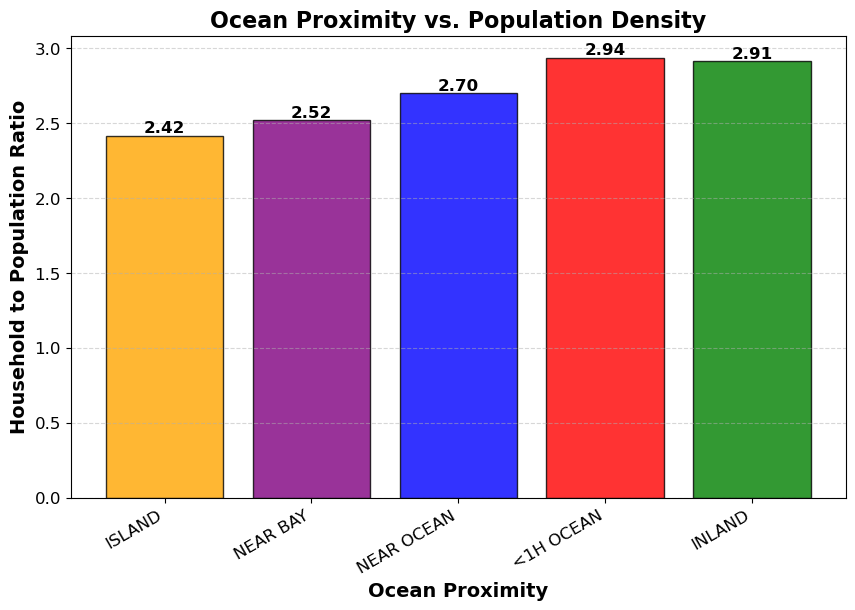

In [4]:
# Extract x and y values
x_values = household_pop_ratio["ocean_proximity"]
y_values = household_pop_ratio["household_to_pop_ratio"]

# Define the desired order for x-axis categories
desired_order = ["ISLAND", "NEAR BAY", "NEAR OCEAN", "<1H OCEAN", "INLAND"]

# Convert data into a DataFrame for easier sorting
df = pd.DataFrame({'ocean_proximity': x_values, 'household_to_pop_ratio': y_values})

# Reorder the DataFrame based on the desired category order
df['ocean_proximity'] = pd.Categorical(df['ocean_proximity'], categories=desired_order, ordered=True)
df = df.sort_values('ocean_proximity')

# Define colors for better visualization
colors = ['orange', 'purple', 'blue', 'red', 'green']

# Create the bar chart with enhancements
plt.figure(figsize=(10, 6))
bars = plt.bar(df['ocean_proximity'], df['household_to_pop_ratio'], color=colors, edgecolor='black', alpha=0.8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add labels and title with improved font sizes
plt.xlabel('Ocean Proximity', fontsize=14, fontweight='bold')
plt.ylabel('Household to Population Ratio', fontsize=14, fontweight='bold')
plt.title("Ocean Proximity vs. Population Density", fontsize=16, fontweight='bold')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the improved plot
plt.show()


This bar chart shows the household to population ratio according to each ocean proximity group. We can see that the Island group has a household to population ratio of 2.42 people to each household and the number of people per household increases slightly as you get further away from the ocean. However, the differnce between the lowest ratio, the Island, is the greatest ratio, the group less than an hour from the ocean, is less than half a person. It does not seem like the proximity to the ocean makes a significant difference in the population density. 